<a href="https://colab.research.google.com/github/dileep9968/pytorch/blob/main/simpal_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [4]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower)-->
  # hidden layser (no of neurons)-->
  #h2 (n) --> output
  def __init__(self, in_features = 4, h1=8,h2=9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [6]:
# pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [12]:
my_df.variety.value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [13]:
my_df['variety']=my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0})
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
# Tranin test Split set x, y
x = my_df.drop('variety',axis=1)
y = my_df['variety']

In [16]:
x = x.values
y = y.values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Treain test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [19]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [20]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
# Set the criterion of model to messure the error how far off the predication are from actual
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [28]:
# prompt: show all the layers of model with name

for name, param in model.named_parameters():
  print(name, param.size())


<generator object Module.parameters at 0x7d34e6387450>


In [29]:
# Train our model
epochs =100
losses = []
for i in range(epochs):
  # forward
  y_pred = model.forward(x_train) # get predication result
  # measure the loss/error
  loss = criterion(y_pred, y_train)
  # keep track of loss
  losses.append(loss.detach().numpy())

  if i%10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.123552680015564
Epoch: 10 and loss: 1.0209215879440308
Epoch: 20 and loss: 0.8427051901817322
Epoch: 30 and loss: 0.6145463585853577
Epoch: 40 and loss: 0.4200771152973175
Epoch: 50 and loss: 0.28270694613456726
Epoch: 60 and loss: 0.18875595927238464
Epoch: 70 and loss: 0.13079768419265747
Epoch: 80 and loss: 0.0974043607711792
Epoch: 90 and loss: 0.07962115854024887


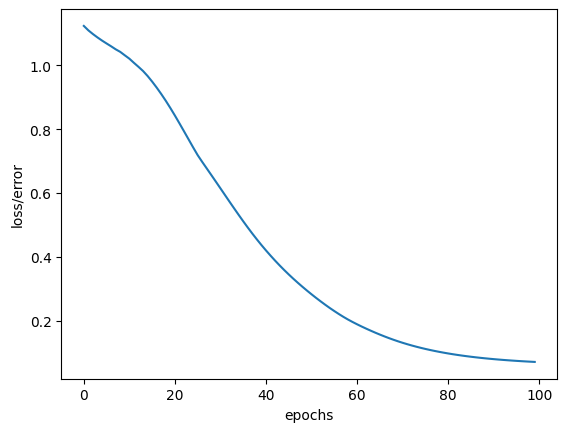

In [30]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')
plt.show()

In [31]:
# evulation
with torch.no_grad():   # off back propogation
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)


In [32]:
loss

tensor(0.0550)

In [36]:
correct = 0
with torch.no_grad():
  for i , data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1}  {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1
  print(f"We got {correct} correct")

1  tensor([ 4.7279, -2.4305, -2.9365]) 	 0
2  tensor([ 4.4695, -2.2098, -2.8103]) 	 0
3  tensor([-9.5344,  4.8694, 11.9400]) 	 2
4  tensor([ 4.8069, -2.4980, -2.9751]) 	 0
5  tensor([ 4.8850, -2.5648, -3.0133]) 	 0
6  tensor([-8.3563,  5.2033,  9.5807]) 	 2
7  tensor([-6.6066,  5.3352,  6.4815]) 	 2
8  tensor([-7.4316,  5.3436,  7.8564]) 	 2
9  tensor([ 4.3555, -2.1124, -2.7547]) 	 0
10  tensor([-6.9661,  4.9841,  7.4909]) 	 2
11  tensor([-3.6852,  5.6080,  1.2967]) 	 1
12  tensor([-4.6937,  4.9707,  3.6865]) 	 1
13  tensor([ 4.2888, -2.0433, -2.7204]) 	 0
14  tensor([ 4.9354, -2.6078, -3.0379]) 	 0
15  tensor([-3.6773,  5.5845,  1.2904]) 	 1
16  tensor([ 5.5035, -3.0931, -3.3153]) 	 0
17  tensor([-4.7844,  5.5907,  3.1395]) 	 1
18  tensor([ 4.5107, -2.2450, -2.8304]) 	 0
19  tensor([-10.8540,   4.2752,  14.8126]) 	 2
20  tensor([-6.8905,  5.6667,  6.6082]) 	 2
21  tensor([-7.6125,  4.5672,  9.0308]) 	 2
22  tensor([ 4.2343, -2.0059, -2.6950]) 	 0
23  tensor([ 4.7068, -2.4120, -2.9262]

In [37]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [38]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.6540, -2.3674, -2.9004])


In [39]:
# Save our model
torch.save(model.state_dict(),'iris_model.pt')

In [40]:
#load model
new_model  = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [41]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)